**NAME:** Priyadharsshini Sakrapani
<br>
**STUDENT ID:** 202285397
<br>
**MUN EMAIL ID:** psakrapani@mun.ca

<B>PRIMARY GOAL:<B> To improve the company’s performance.
<BR>
<B>SUB GOALS:</B>
- To identify the most profitable landscaping service and also the demand for each landscaping service, which will help the company to optimize its service offerings to focus on the most profitable services. 
- Identifying the most efficient employee and their achieved customer satisfaction which will help the company identify if additional training may be needed. This will help the company to improve its workforce and improve its overall performance.  

In [1]:
# Import all libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
warnings.filterwarnings("ignore")

# Load all necessary files
landscape_df = pd.read_csv('landscaping.csv', keep_default_na=False)
calendar_df = pd.read_csv('calendar.csv', keep_default_na=False)
employees_df = pd.read_csv('employees.csv', keep_default_na=False)

### EXPLORATORY VISUALIZATION
The stacked bar chart to visualize the distribution of <b>job start dates</b> by <b>service type</b> for the year 2022. The data is first grouped by service type and year/month and the number of jobs for each combination is counted. The resulting table is then pivoted to create a stacked bar chart where each service type is represented by a different color. <b>The x-axis represents the months of the year, while the y-axis represents the number of jobs</b>.
<br>
<br>

This could help the company understand the seasonality of different services and plan their resources accordingly.

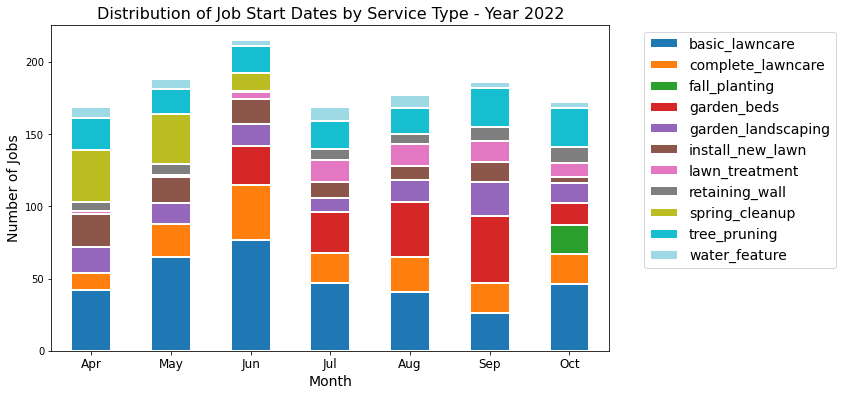

In [2]:
# extract year and month from start_date
landscape_df['year_month'] = pd.to_datetime(landscape_df['start_date']).dt.to_period('M')

# group the data by service type and year/month, and count the number of jobs for each type 
job_counts = landscape_df.groupby(['job_type', 'year_month']).size().reset_index(name='count')
job_counts_pivot = job_counts.pivot(index='year_month', columns='job_type', values='count')

# create color tab and plot the data
color_map = plt.get_cmap('tab20')
colors = color_map(np.linspace(0, 1, len(job_counts_pivot.columns)))
ax = job_counts_pivot.plot(kind='bar', stacked=True, figsize=(10,6), linewidth=2, edgecolor='white', color=colors)


# add labels and title
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Jobs', fontsize=14)
ax.set_title('Distribution of Job Start Dates by Service Type - Year 2022', fontsize=16)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

labels = [x.strftime('%b') for x in job_counts_pivot.index]
ax.set_xticklabels(labels, fontsize=12, rotation=0)
ax.set_facecolor('white')
fig = ax.get_figure()
fig.set_facecolor('white')

# show the plot
plt.show()

<b> INQUIRIES FROM THE ABOVE PLOT </b>

- What was the service type that had the highest number of jobs in each month of 2022? 
- Are there any noticeable trends or patterns in the distribution of job start dates across different service types? 
- Is there any particular month or months where the company had a higher number of jobs across all service types? 

<i><b>For example</b>, we can see that the ‘June’ month has the highest demand. There was more demand for ‘garden_beds’ service in the month of ‘September’.</i>




### EXPLANATORY VISUALIZATION

The below heatmap shows the <b>average customer satisfaction rating for each job type</b> broken down by the <b>total number of jobs</b> performed for each job type in the landscape industry. Each <b>row</b> represents a <b>job type</b>, and each <b>column</b> represents a range of <b>total jobs</b> performed for that job type. The <b>color</b> of each cell represents the <b>average satisfaction rating</b> for the corresponding job type and total number of jobs.

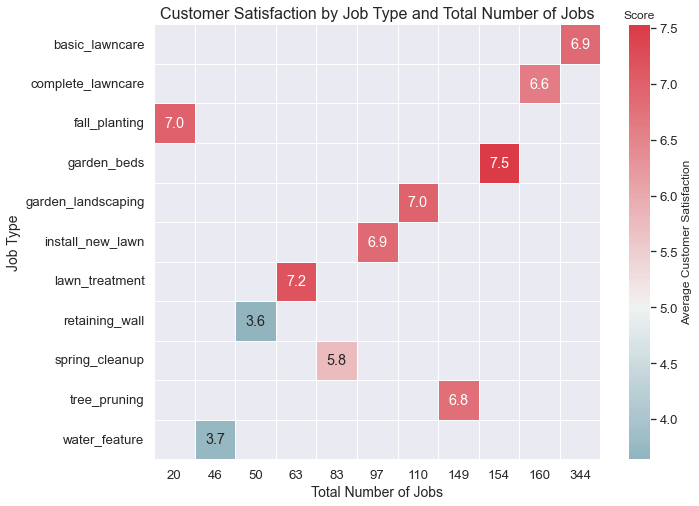

In [3]:
# calculate the total number of jobs for each job type
total_jobs = landscape_df.groupby('job_type')['job_id'].count().reset_index()

# calculate the average satisfaction rating
avg_satisfaction = landscape_df.groupby('job_type')['customer_satisfaction'].mean().reset_index()

# merge the two dataframes
merged = pd.merge(total_jobs, avg_satisfaction, on='job_type')
pivot = merged.pivot(index='job_type', columns='job_id', values='customer_satisfaction')

# create a color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# create the heatmap using seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot, cmap=cmap, center=5, annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Average Customer Satisfaction'})
cbar = ax.collections[0].colorbar
cbar.set_label('Average Customer Satisfaction', fontsize=12)
cbar.ax.set_title('Score', fontsize=12)
cbar.outline.set_linewidth(1)

# add labels and title
plt.xlabel('Total Number of Jobs', fontsize=14)
plt.ylabel('Job Type', fontsize=14)
plt.title('Customer Satisfaction by Job Type and Total Number of Jobs', fontsize=16)
ax.grid(False)
plt.show()

#### BRIEF ANALYSIS FROM THE ABOVE VISUALIZATION
<br>
This explanatory plot  allows us to identify <b>which job types have higher or lower customer satisfaction ratings</b> on average. The graph shows that some job types, such as <b>‘lawn_treatment’ and ‘garden_beds’</b>, tend to have <b>higher customer satisfaction</b> ratings, while others, such as <b>‘retaining_wall’ and ‘water_feature’</b> have <b>lower ratings</b>. This information could be useful for landscape companies looking to <b>improve customer satisfaction</b> for specific job types (either by providing training to employees or other ways).


### EXPLORATORY INTERACTIVE VISUALIZATION

The below line chart <b>displays either the demand or profit for each landscape service over time</b>. The chart is <b>interactive and the user can select between 'Demand' or 'Profit' using a dropdown widget</b>. If the user selects 'Demand', the chart displays the number of jobs for each landscape service over time. If the user selects 'Profit', the chart displays the profit for each landscape service over time. The x-axis represents the year and month, while the y-axis represents the number of jobs or profit in dollars. Each line in the chart represents a landscape service, and the legend on the right side shows the color coding for each service. The chart also includes x-tick labels that display every other month, and a title and axis labels to provide context for the data.
<br>
<br>
For example, if we are  interested in a particular type of service, we could use the plot to see how much demand there is for that service and whether the company is making a profit from it. This could help the company make an informed decision about whether to use the service or not

In [7]:
# Compute profit by subtracting material cost from invoice amount
landscape_df['profit'] = landscape_df['invoice_amount'] - landscape_df['material_costs']
landscape_df['year_month'] = pd.to_datetime(landscape_df['start_date']).dt.to_period('M')

def create_pivot_table_and_plot(select_value):
    # Compute the demand or profit pivot table depending on the user's selection
    if select_value == 'Demand':
        pivot_table = landscape_df.pivot_table(index='year_month', columns='job_type', values='job_id', aggfunc='count', fill_value=0)
        title = 'Demand for Each Landscape Service'
        ylabel = 'Number of Jobs'
    else:
        pivot_table = landscape_df.pivot_table(index='year_month', columns='job_type', values='profit', aggfunc='sum', fill_value=0)
        title = 'Profit for Each Landscape Service'
        ylabel = 'Profit ($)'

    # define color tab
    color_map = plt.get_cmap('tab20')
    colors = color_map(np.linspace(0, 1, len(pivot_table.columns)))

    fig, ax = plt.subplots(figsize=(12, 6))
    pivot_table.plot(ax=ax, color=colors)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('Year-Month', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

    # Set the x-tick labels to display every other month
    xticks = ax.get_xticks()[::2]
    xticklabels = [pd.Period(x, freq='M').strftime('%Y-%m') for x in xticks]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=45, ha='right')

    # Set the legend outside the chart area to avoid overlapping with the lines
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    # Show the plot
    plt.show()

# Create a dropdown widget
select_widget = widgets.Dropdown(options=['Demand', 'Profit'], value='Demand', description='Select:')

# Display the widget and plot
widgets.interactive(create_pivot_table_and_plot, select_value=select_widget)


interactive(children=(Dropdown(description='Select:', options=('Demand', 'Profit'), value='Demand'), Output())…

<b>INQUIRIES FROM THE ABOVE PLOT:</b>
- Are there any seasonal patterns in demand or profit for particular types of landscape services? 
- Which types of landscape services are the most profitable, and how has their profitability changed over time? 
- Are there any types of landscape services that are consistently in high demand, but not very profitable? 

### EXPLORATORY  VISUALIZATION WITH DERIVED DATA TYPE
<b>The lollipop chart</b> displays the <b>average customer satisfaction rating for each employee</b> in a company. The chart shows each employee ID on the y-axis and their respective mean satisfaction rating on the x-axis. The employee IDs are sorted in <b>descending order by their mean rating</b>, with the highest-rated employees at the top. The chart also includes horizontal lines for each rating level (from 1 to 10), <b>a horizontal line for the overall mean rating</b>, and a text label showing the mean rating value. 
<br>
The chart is designed to help identify which employees are providing the best customer service based on customer satisfaction ratings.

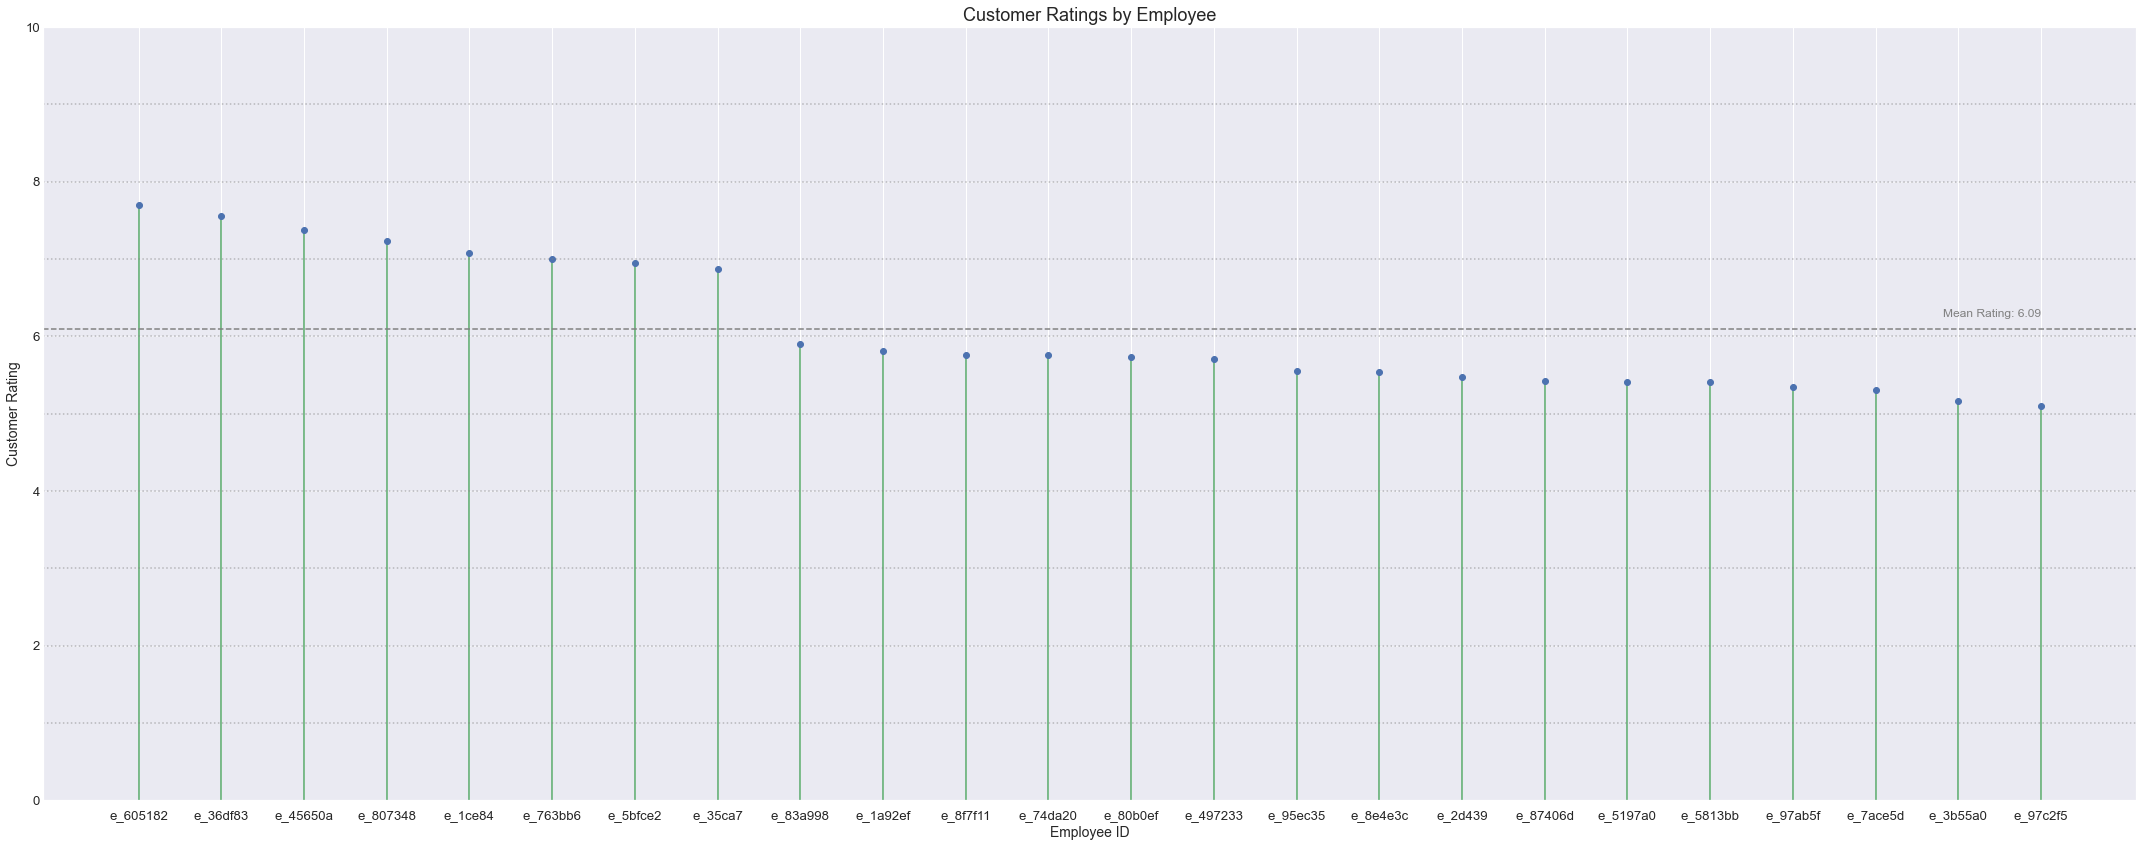

In [4]:
# create derived data type
employee_id = []
job_ids = {}
satisfaction_ratings = {}

df = calendar_df.drop(columns=['date'])

for col in df.columns:
    employee_id.append(col)

for empid in employee_id:
    job_ids[empid] = df.loc[df[empid] != '', empid].tolist()
    
for empid, jobs in job_ids.items():
    for jobid in jobs:
        satisfaction_rating = landscape_df.loc[landscape_df['job_id'] == jobid, 'customer_satisfaction'].values
        if len(satisfaction_rating) > 0:
            satisfaction_ratings.setdefault(empid, []).append(satisfaction_rating[0])

# Sort employee IDs and mean ratings in descending order
sorted_ratings = sorted(satisfaction_ratings.items(), key=lambda x: sum(x[1])/len(x[1]), reverse=True)
sorted_employee_ids = [x[0] for x in sorted_ratings]
mean_ratings = [sum(x[1])/len(x[1]) for x in sorted_ratings]

# Plot lollipop chart
fig, ax = plt.subplots(figsize=(30, len(sorted_employee_ids)*0.5))
ax.stem(sorted_employee_ids, mean_ratings, linefmt='g-', markerfmt='bo', basefmt=' ')

# Add horizontal lines for each rating level
for i in range(1, 10):
    ax.axhline(y=i, linestyle=':', color='gray', alpha=0.5)

ax.set_title('Customer Ratings by Employee', fontsize=18)

ax.set_xlabel('Employee ID', fontsize=14)
ax.set_ylabel('Customer Rating', fontsize=14)

ax.set_ylim(0, 10)  # set y-axis limits
ax.tick_params(axis='y', length=0)  # hide y-axis ticks
# Add a horizontal line at the mean rating
mean_rating = sum(mean_ratings) / len(mean_ratings)
ax.axhline(mean_rating, color='gray', linestyle='--', linewidth=1.5)

ax.text(len(sorted_employee_ids)-1, mean_rating+0.2, f'Mean Rating: {mean_rating:.2f}', ha='right', va='center', fontsize=12, color='gray')

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()

<b> INQUIRIES FROM THE ABOVE PLOT </b>

- What is the mean rating earned by the employees? 
- Who is the employee with the highest cutomer rating and the one with the lowest customer rating? 

From the above graph it can be concluded that ‘e_97c2f5’ has earned the least customer satisfaction while ‘e_605182’ the most. This way, the company can find the employees with the least ratings and train them accordingly.

